In [2]:
! pip install tensorboard

  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ---------------------------------------- 0.0/4.4 MB ? eta -:--:--
   --------------------- ------------------ 2.4/4.4 MB 15.0 MB/s eta 0:00:01
   ---------------------------------------- 4.4/4.4 MB 13.2 MB/s eta 0:00:00
Using cached Markdown-3.7-py3-none-any.whl (106 kB)
Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl (431 kB)
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

############## TENSORBOARD ########################
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist1')
###################################################


In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
# hyper parameters
input_size = 784 # 28 x 28
hideen_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([100, 1, 28, 28]) torch.Size([100])


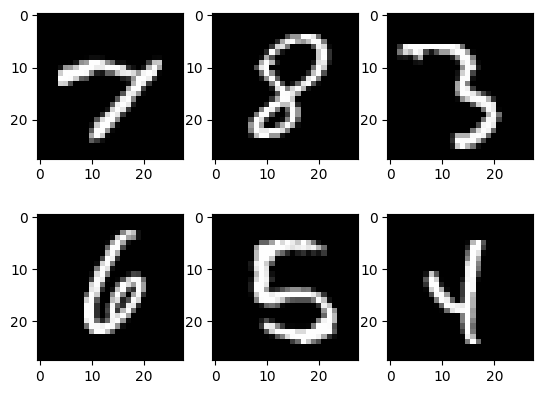

In [15]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
# print the size of the train_dataset.
print(train_dataset.data.size())
print(test_dataset.data.size())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)

print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(samples[i][0], cmap='gray')
    
# plt.show()
############## TENSORBOARD ########################
img_grid = torchvision.utils.make_grid(samples)
writer.add_image('mnist_images', img_grid)
###################################################

In [16]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hideen_size, num_classes).to(device)

## loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

############## TENSORBOARD ########################
writer.add_graph(model, samples.reshape(-1, 28*28).to(device))
###################################################

## training loop
running_loss = 0.0
running_correct = 0

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()

        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs} step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
            
            ############## TENSORBOARD ########################
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0
            ###################################################


epoch 1/5 step 100/600, loss = 0.3580
epoch 1/5 step 200/600, loss = 0.4261
epoch 1/5 step 300/600, loss = 0.4033
epoch 1/5 step 400/600, loss = 0.2787
epoch 1/5 step 500/600, loss = 0.3275
epoch 1/5 step 600/600, loss = 0.2377
epoch 2/5 step 100/600, loss = 0.2481
epoch 2/5 step 200/600, loss = 0.2482
epoch 2/5 step 300/600, loss = 0.1375
epoch 2/5 step 400/600, loss = 0.1321
epoch 2/5 step 500/600, loss = 0.1391
epoch 2/5 step 600/600, loss = 0.1084
epoch 3/5 step 100/600, loss = 0.1733
epoch 3/5 step 200/600, loss = 0.1123
epoch 3/5 step 300/600, loss = 0.1692
epoch 3/5 step 400/600, loss = 0.2269
epoch 3/5 step 500/600, loss = 0.0993
epoch 3/5 step 600/600, loss = 0.0889
epoch 4/5 step 100/600, loss = 0.0740
epoch 4/5 step 200/600, loss = 0.0933
epoch 4/5 step 300/600, loss = 0.0713
epoch 4/5 step 400/600, loss = 0.0504
epoch 4/5 step 500/600, loss = 0.1226
epoch 4/5 step 600/600, loss = 0.1732
epoch 5/5 step 100/600, loss = 0.0931
epoch 5/5 step 200/600, loss = 0.1731
epoch 5/5 st

In [17]:
# test
class_labels = []
class_preds = []

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)        
        
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()
        
        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(labels)
        
# 10000, 10, and 10000, 1
# stack concatenates tensors along a new dimension
# cat concatenates tensors in the given dimension
class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
class_labels = torch.cat(class_labels)

acc = 100.0 * n_correct / n_samples
print(f'Accuracy = {acc}')    

############## TENSORBOARD ########################
classes = range(10)
for i in classes:
    labels_i = class_labels == i
    preds_i = class_preds[:, i]
    writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
    writer.close()
###################################################    

Accuracy = 0.98
